# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

Dataset: The chosen dataset for this assignment is: https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik.

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

In [18]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 

y = y.values.ravel()
y_encoded = LabelEncoder().fit_transform(y)

df = pd.concat([X, pd.Series(y_encoded, name='class')], axis=1)

                name     role        type demographic  \
0               Area  Feature     Integer        None   
1          Perimeter  Feature  Continuous        None   
2  Major_Axis_Length  Feature  Continuous        None   
3  Minor_Axis_Length  Feature  Continuous        None   
4       Eccentricity  Feature  Continuous        None   
5        Convex_Area  Feature     Integer        None   
6             Extent  Feature  Continuous        None   
7              Class   Target      Binary        None   

                                         description units missing_values  
0  Returns the number of pixels within the bounda...    px             no  
1  Calculates the circumference by calculating th...    px             no  
2  The longest line that can be drawn on the rice...  None             no  
3  The shortest line that can be drawn on the ric...  None             no  
4  It measures how round the ellipse, which has t...  None             no  
5  Returns the pixel count of 

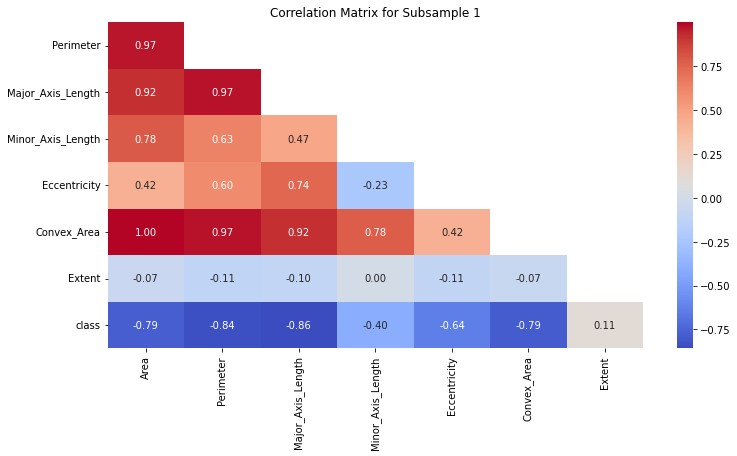

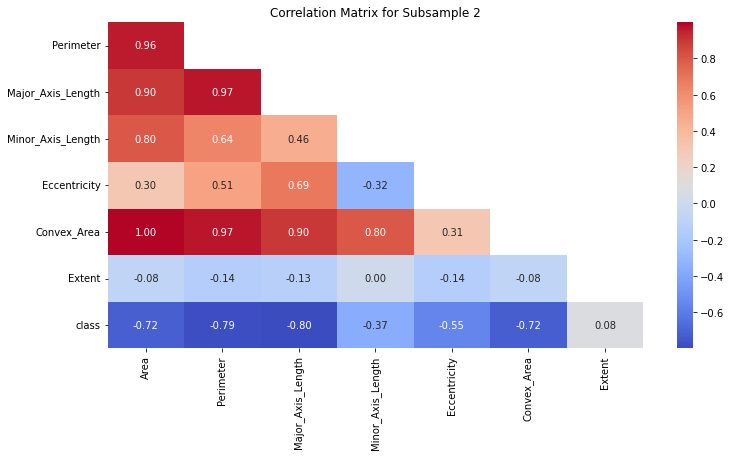

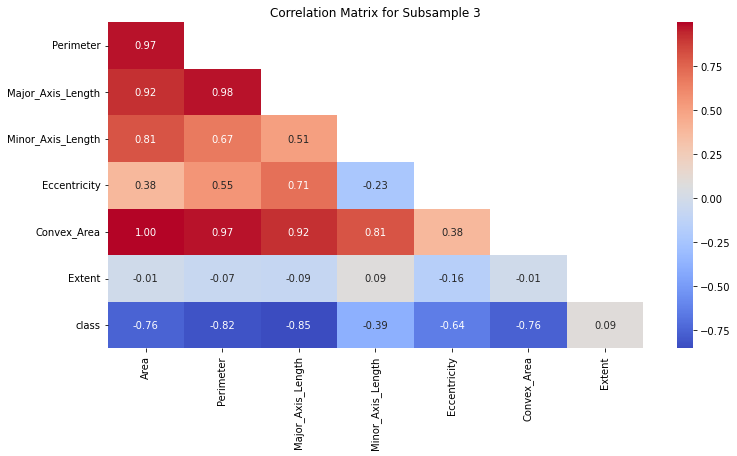

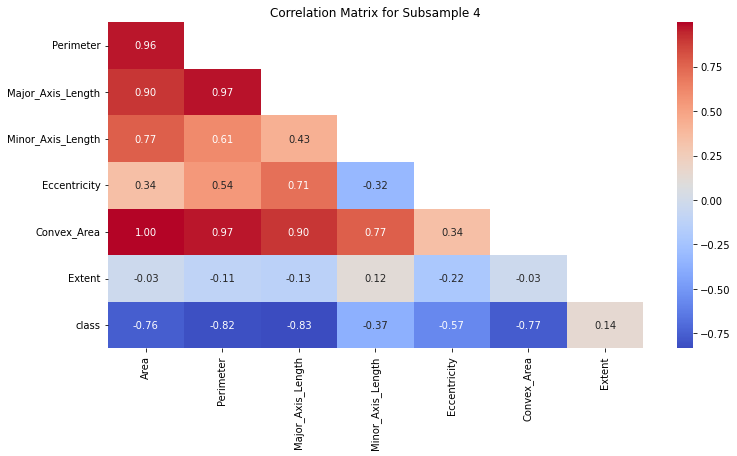

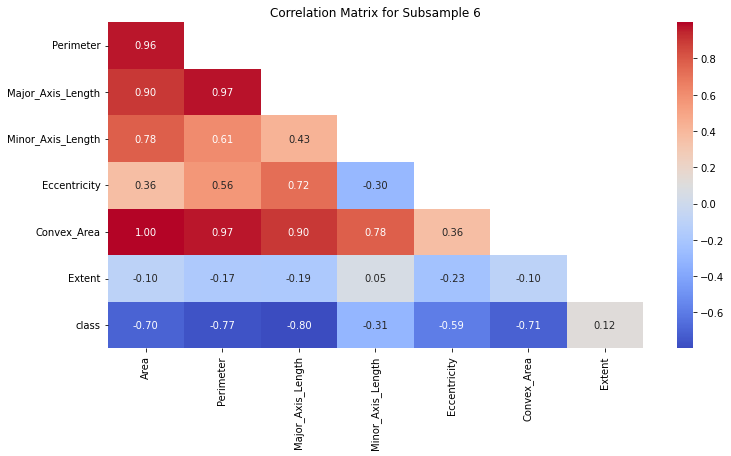

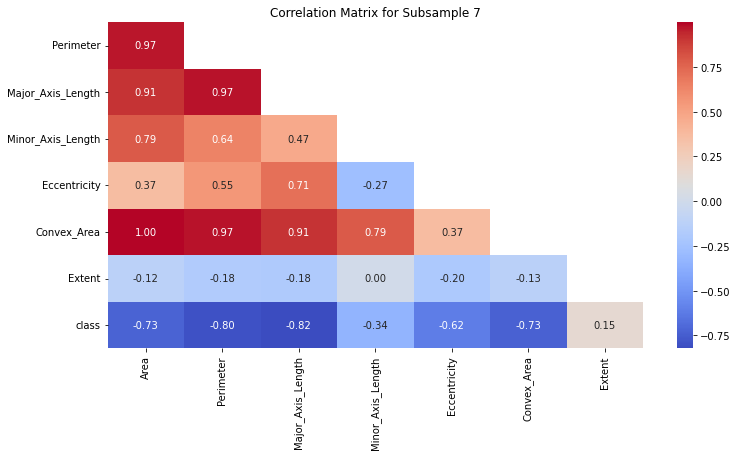

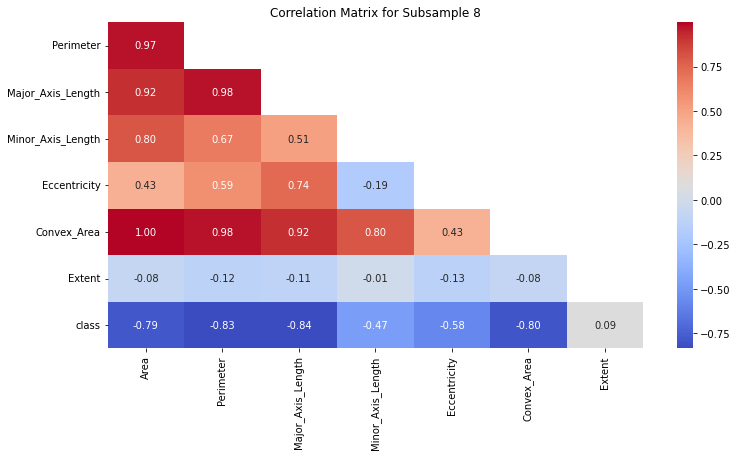

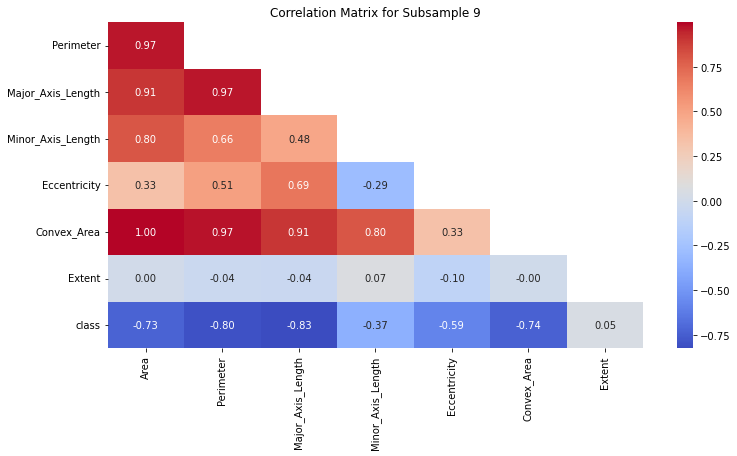

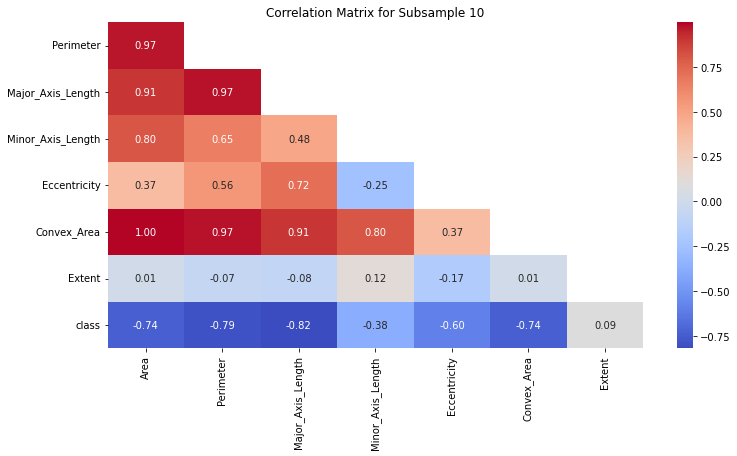

In [10]:
num_subsamples = 10
subsample_size = len(df) // num_subsamples

for i in range(num_subsamples):
    subsample = df.sample(subsample_size, random_state=i)
    correlation_matrix = subsample.corr()

    mask = np.zeros_like(correlation_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    df_corr_viz = correlation_matrix.mask(mask).dropna(how='all').dropna(axis=1, how='all')
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(df_corr_viz, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Matrix for Subsample {i+1}')
    plt.show()

**TASK (Classification): If your problem is a classification problem, visually check if the target variable is imbalanced**

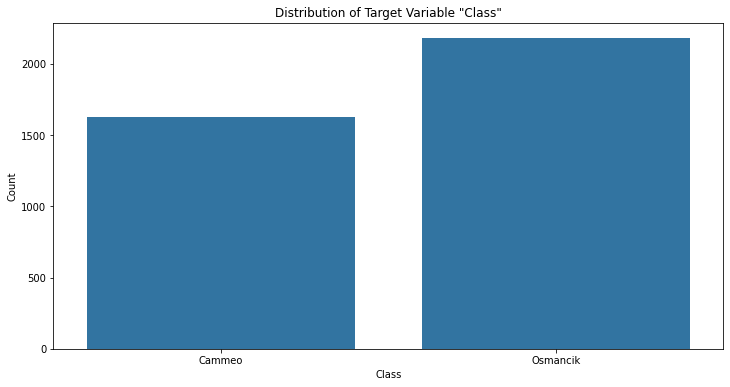

In [11]:
y = pd.Series(y).astype('category')

plt.figure(figsize=(12, 6))

sns.countplot(x=y)

plt.title('Distribution of Target Variable "Class"')

plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

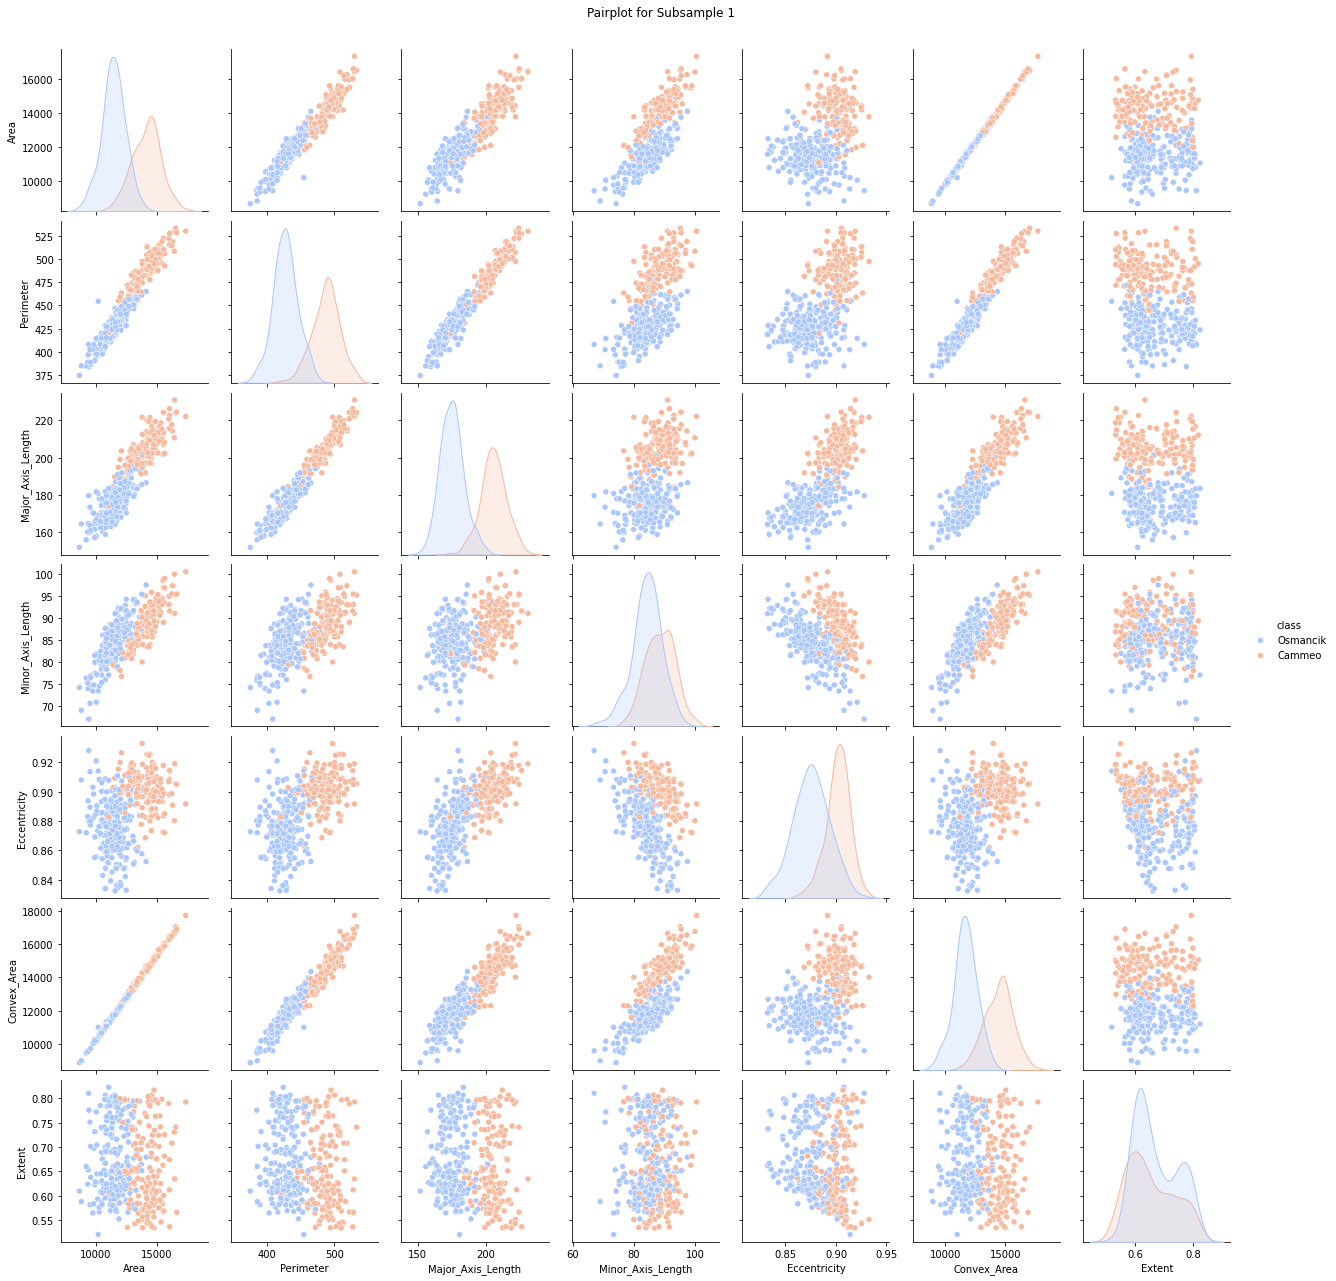

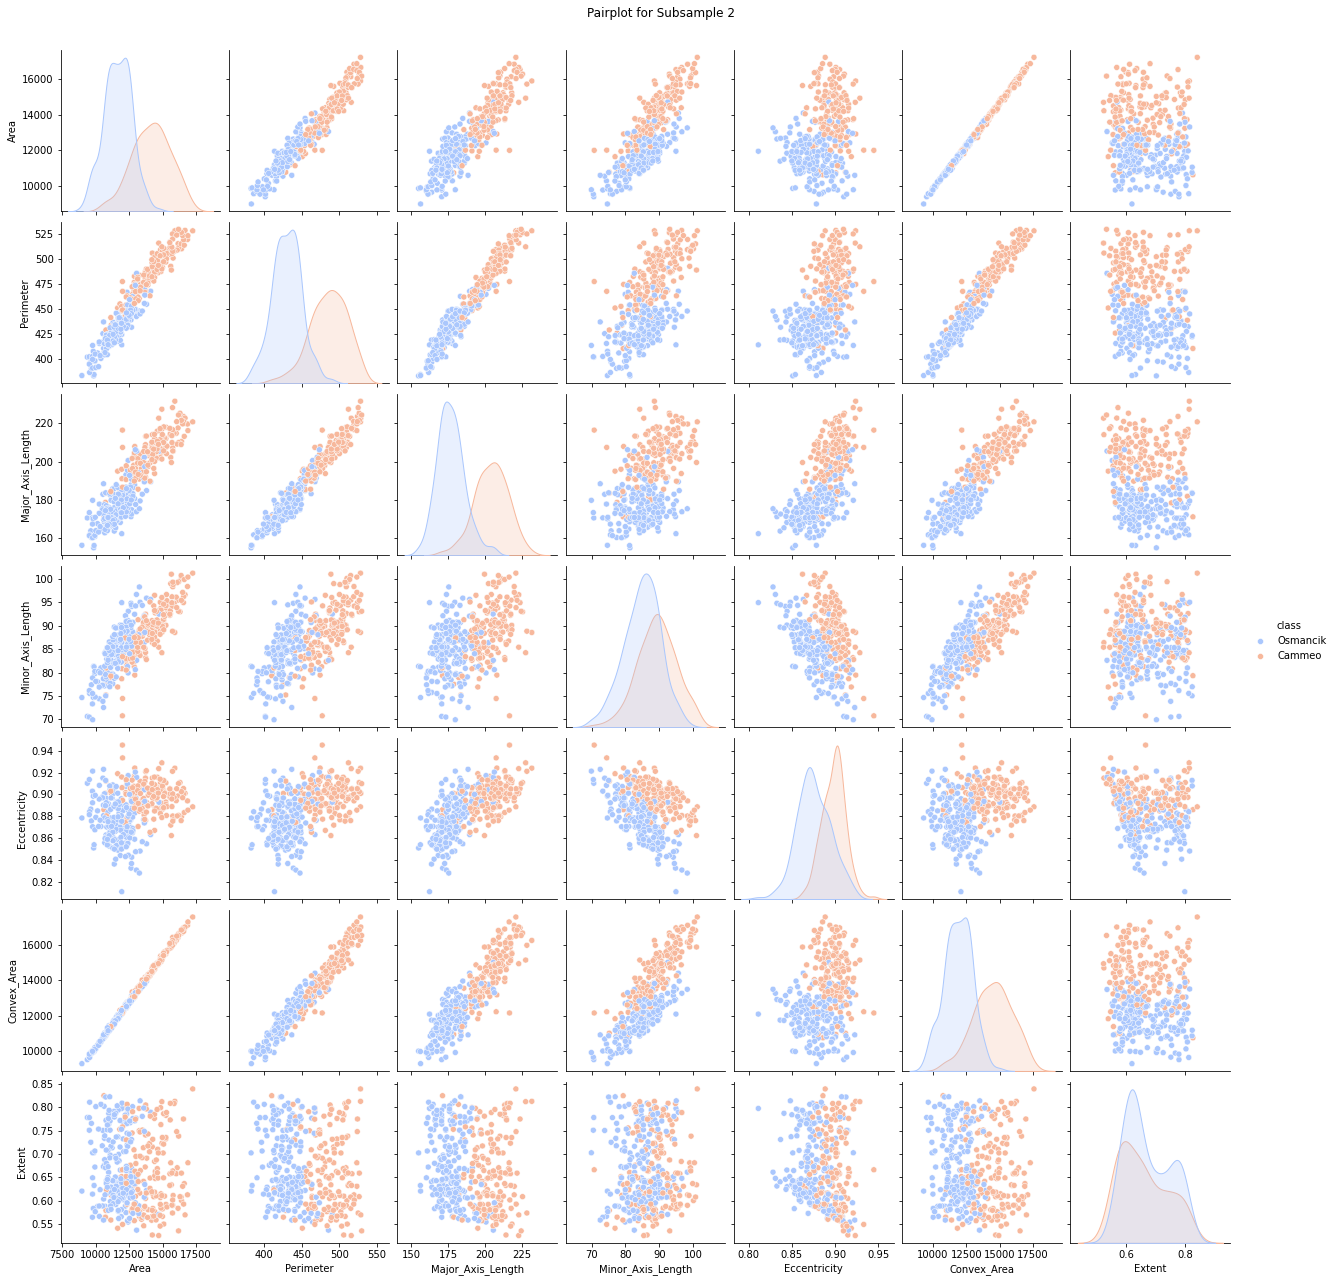

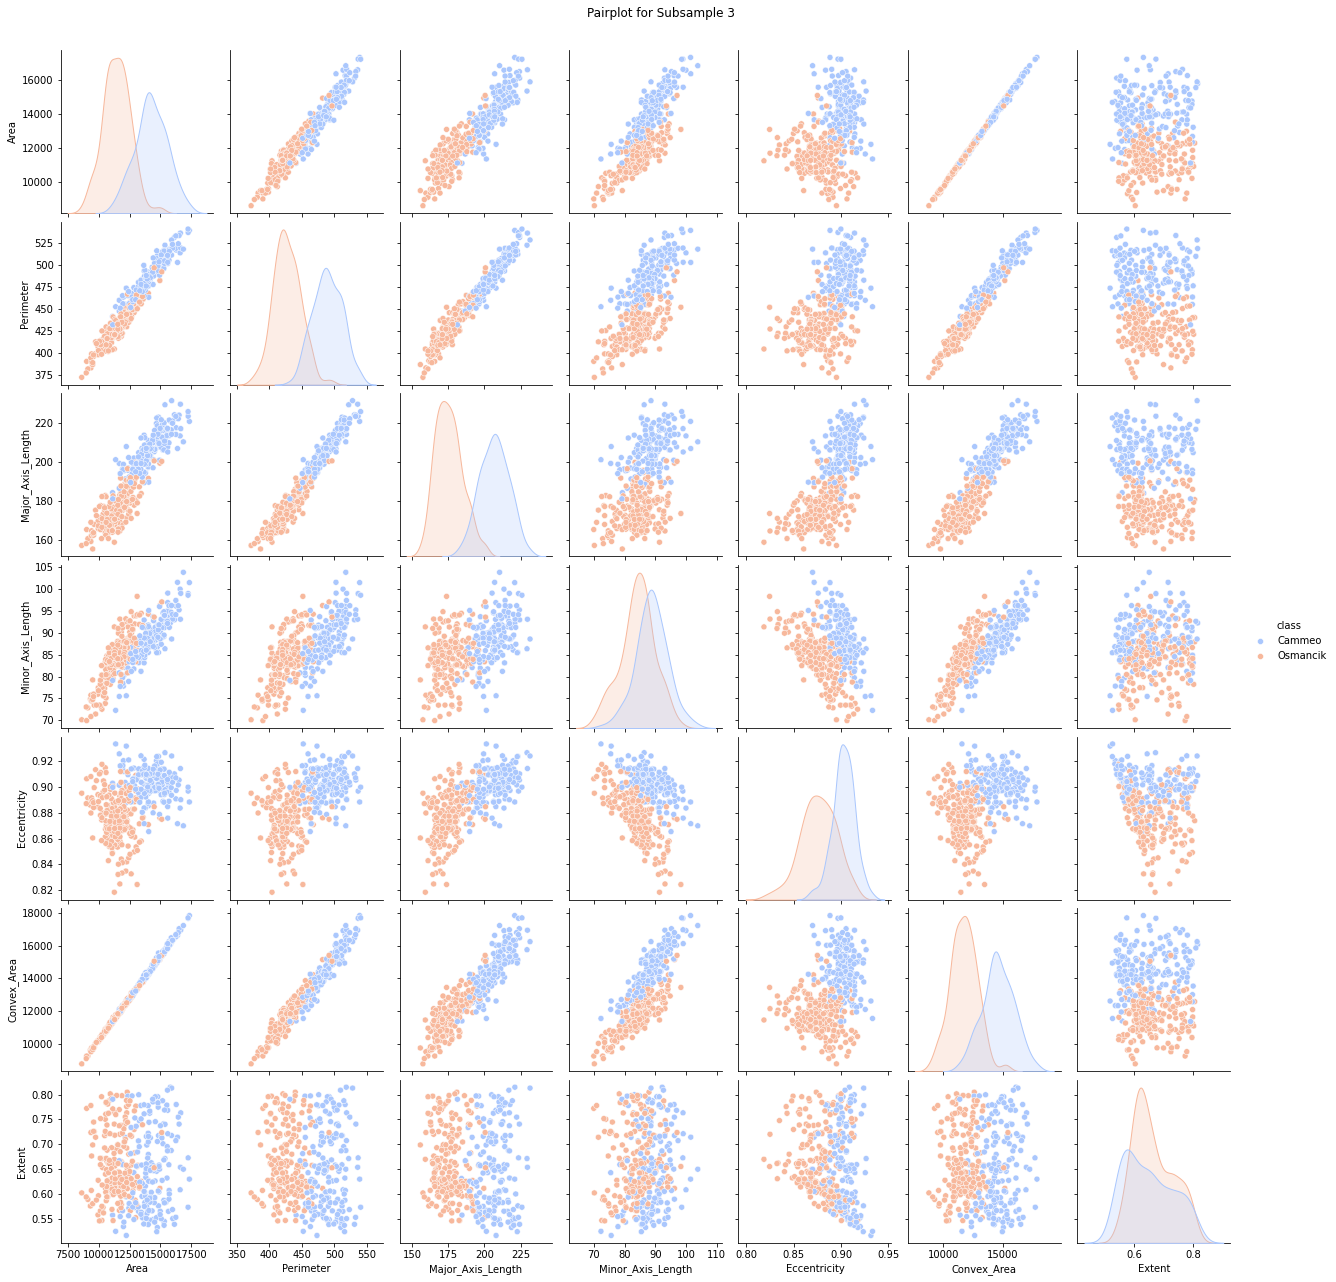

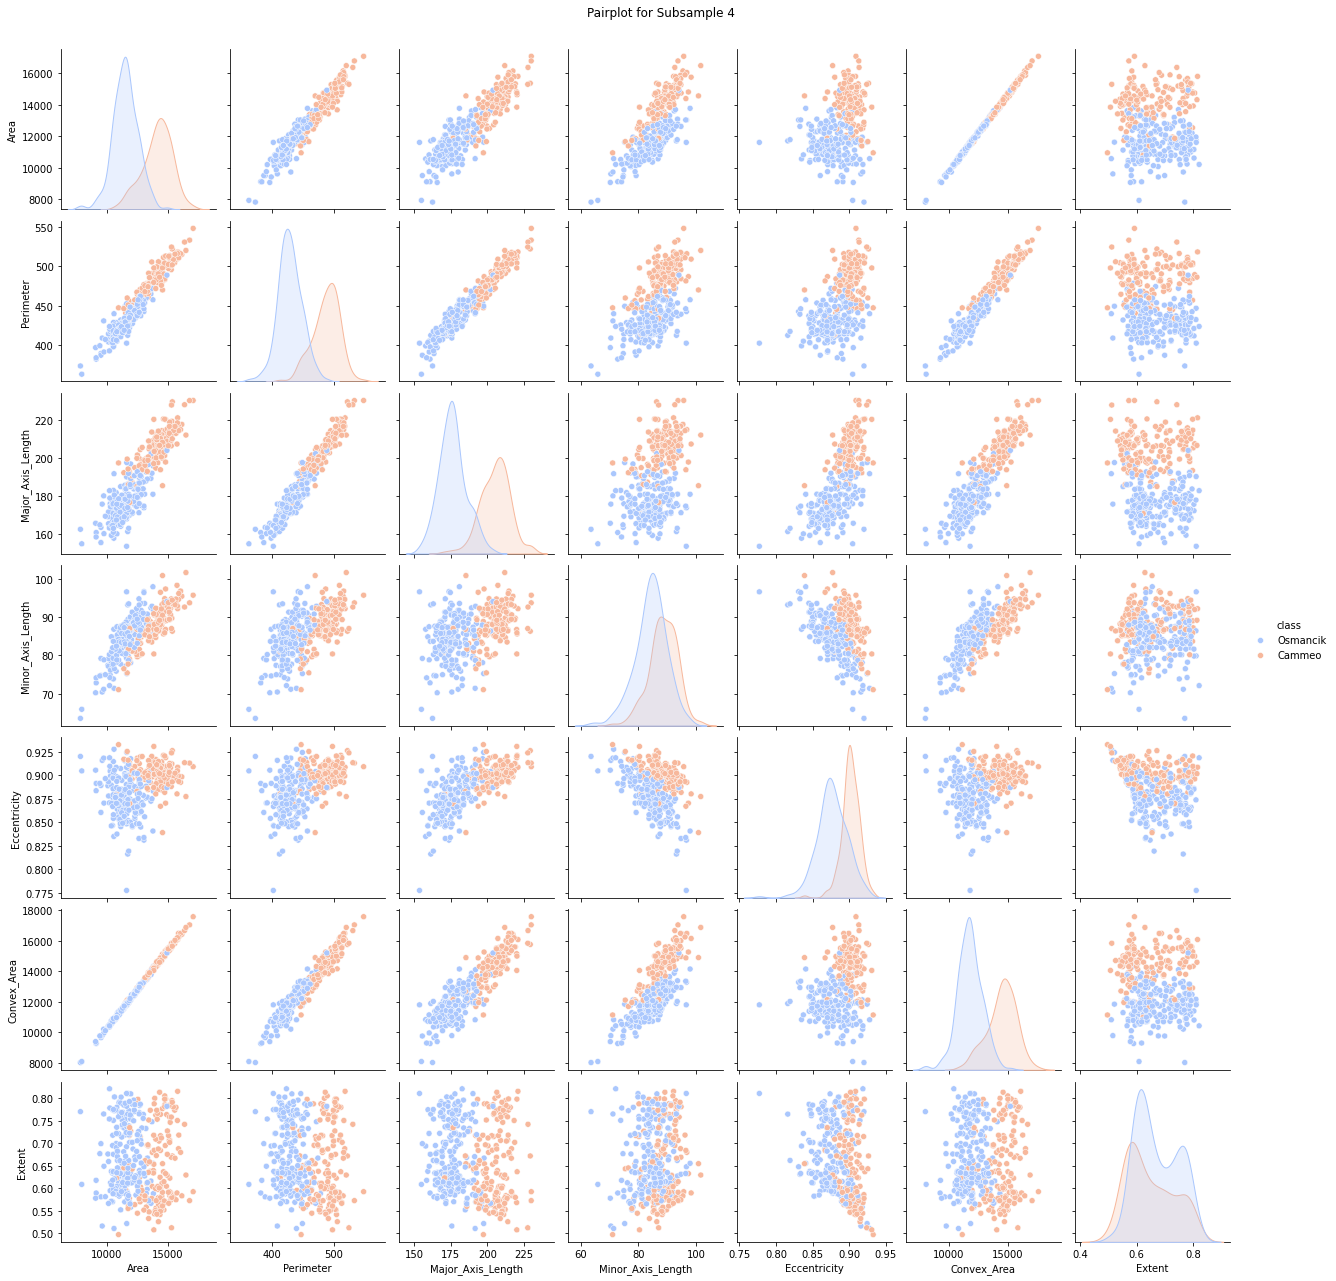

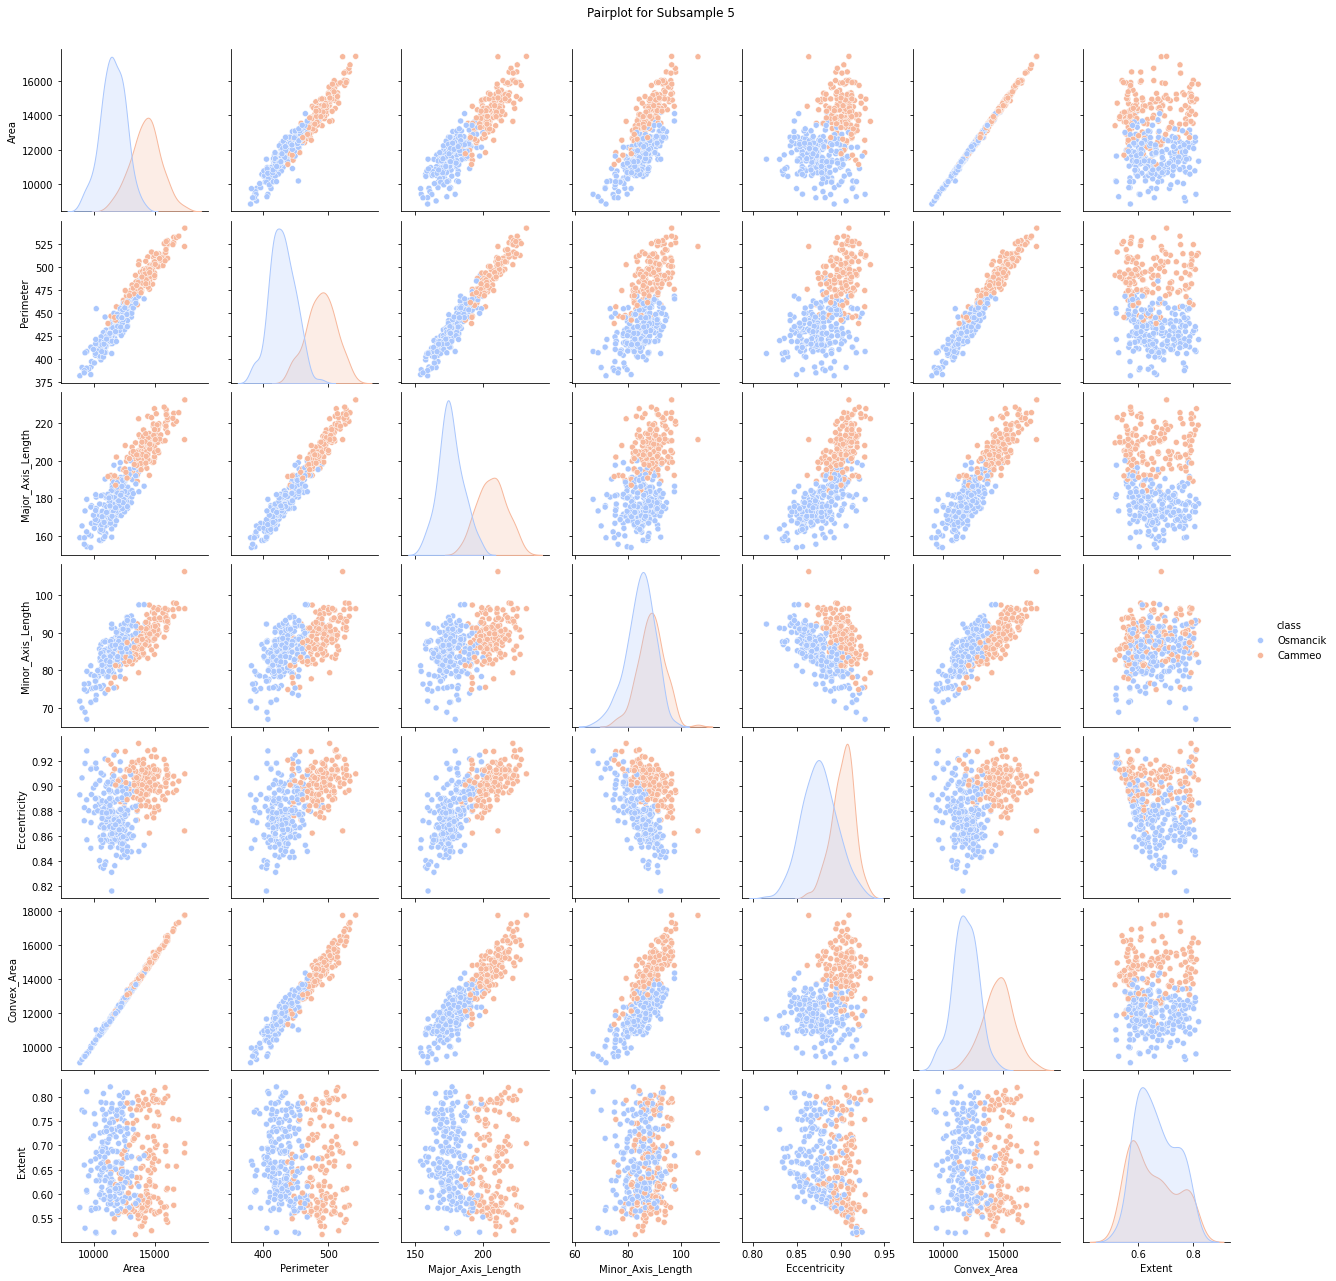

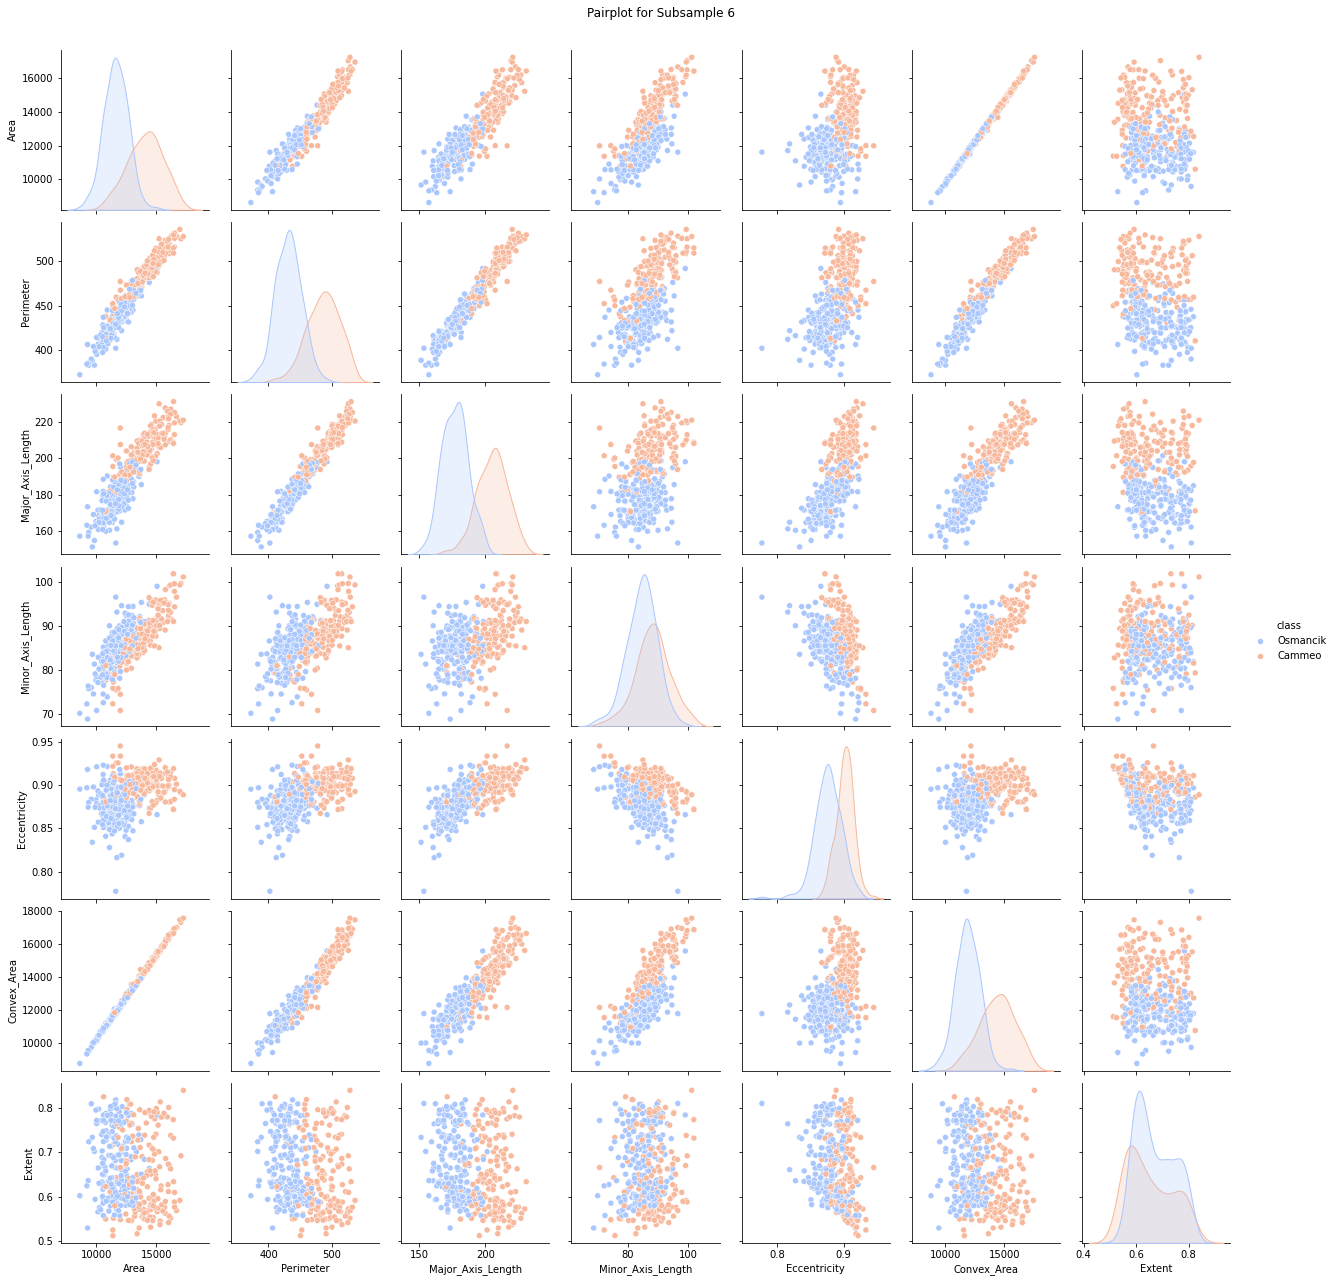

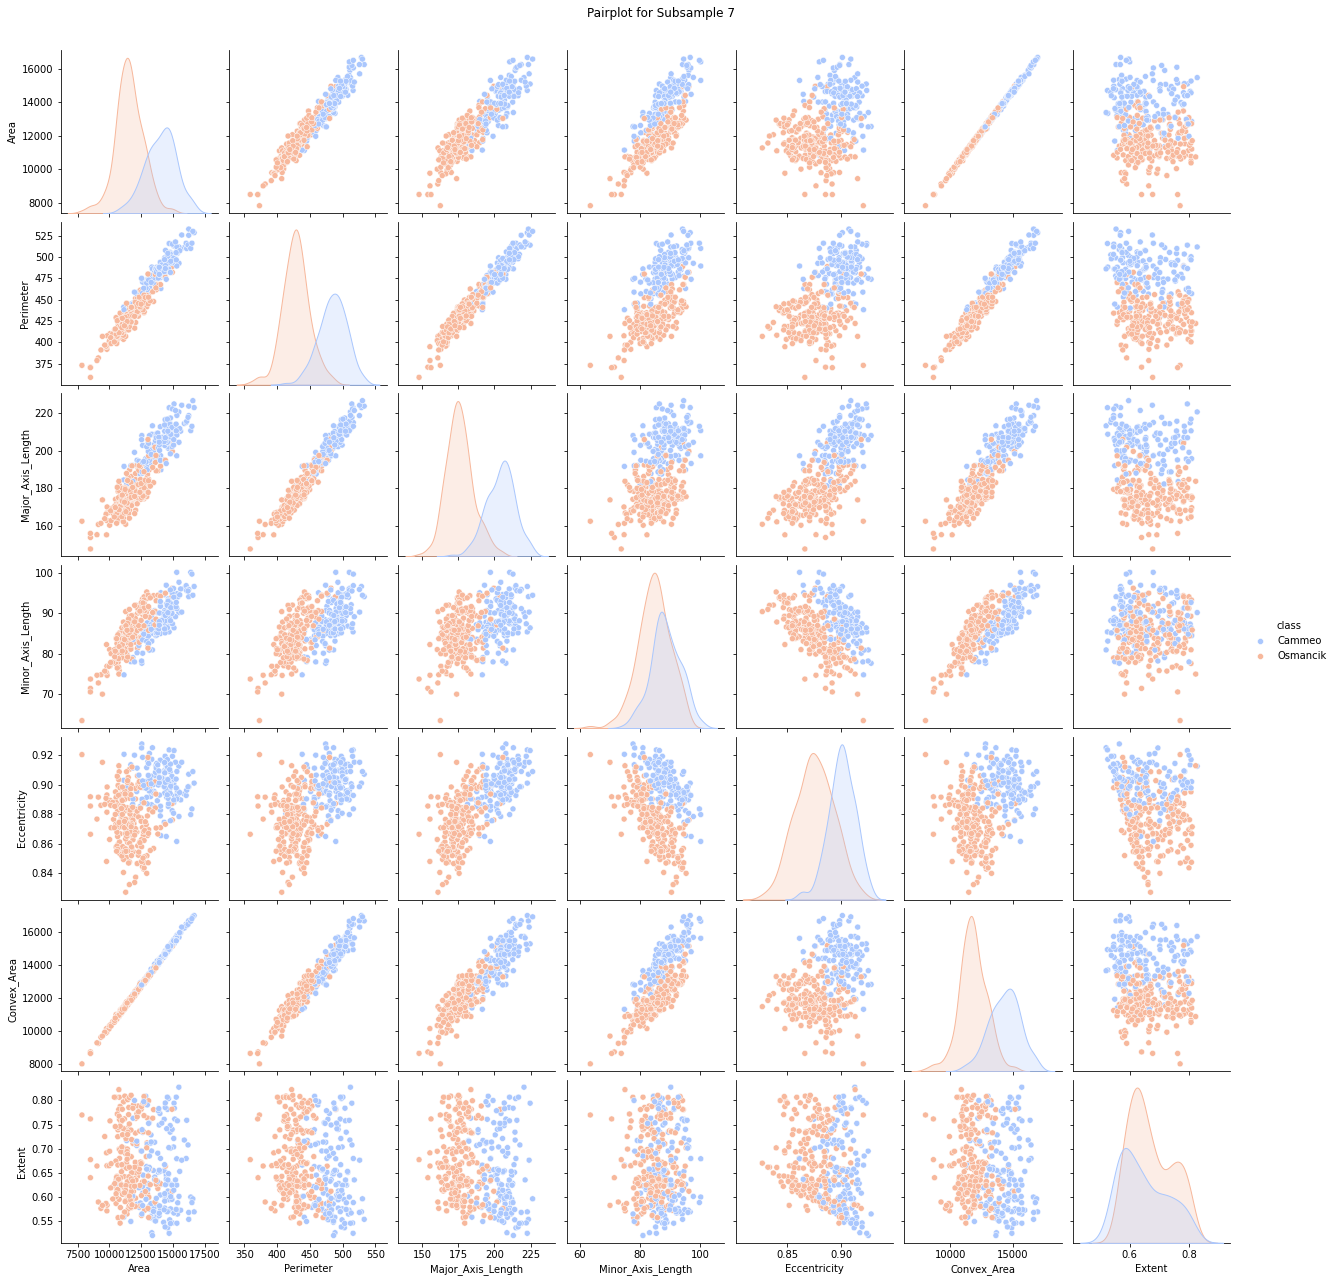

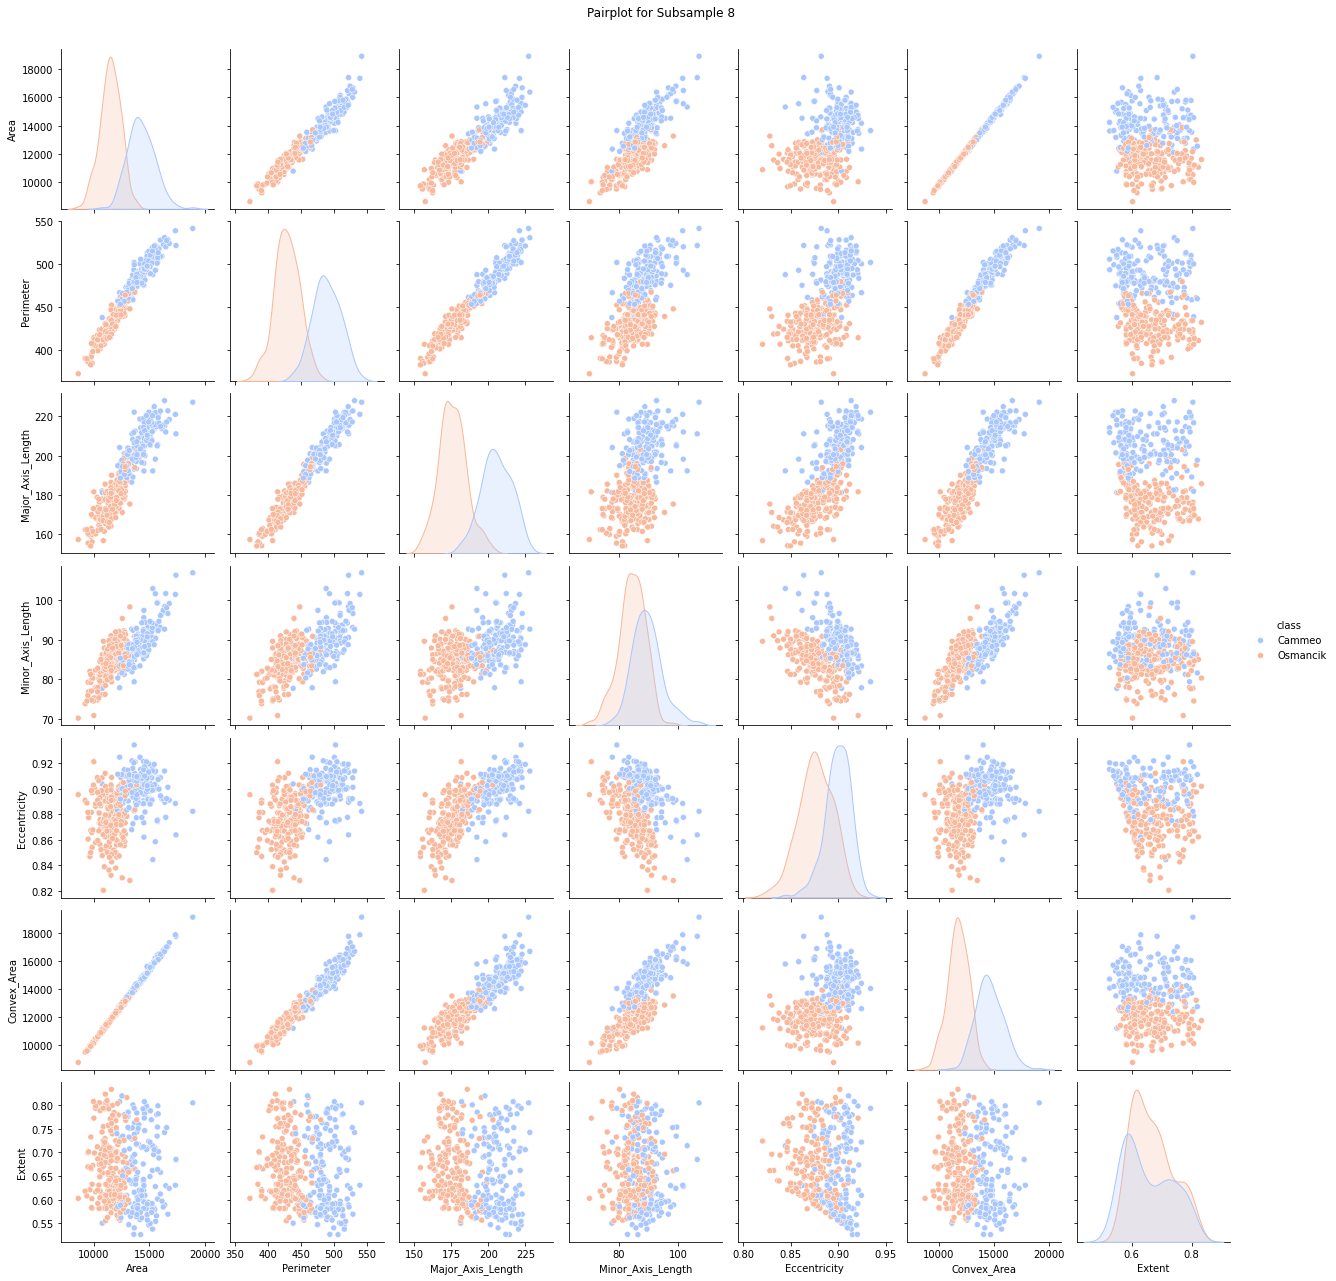

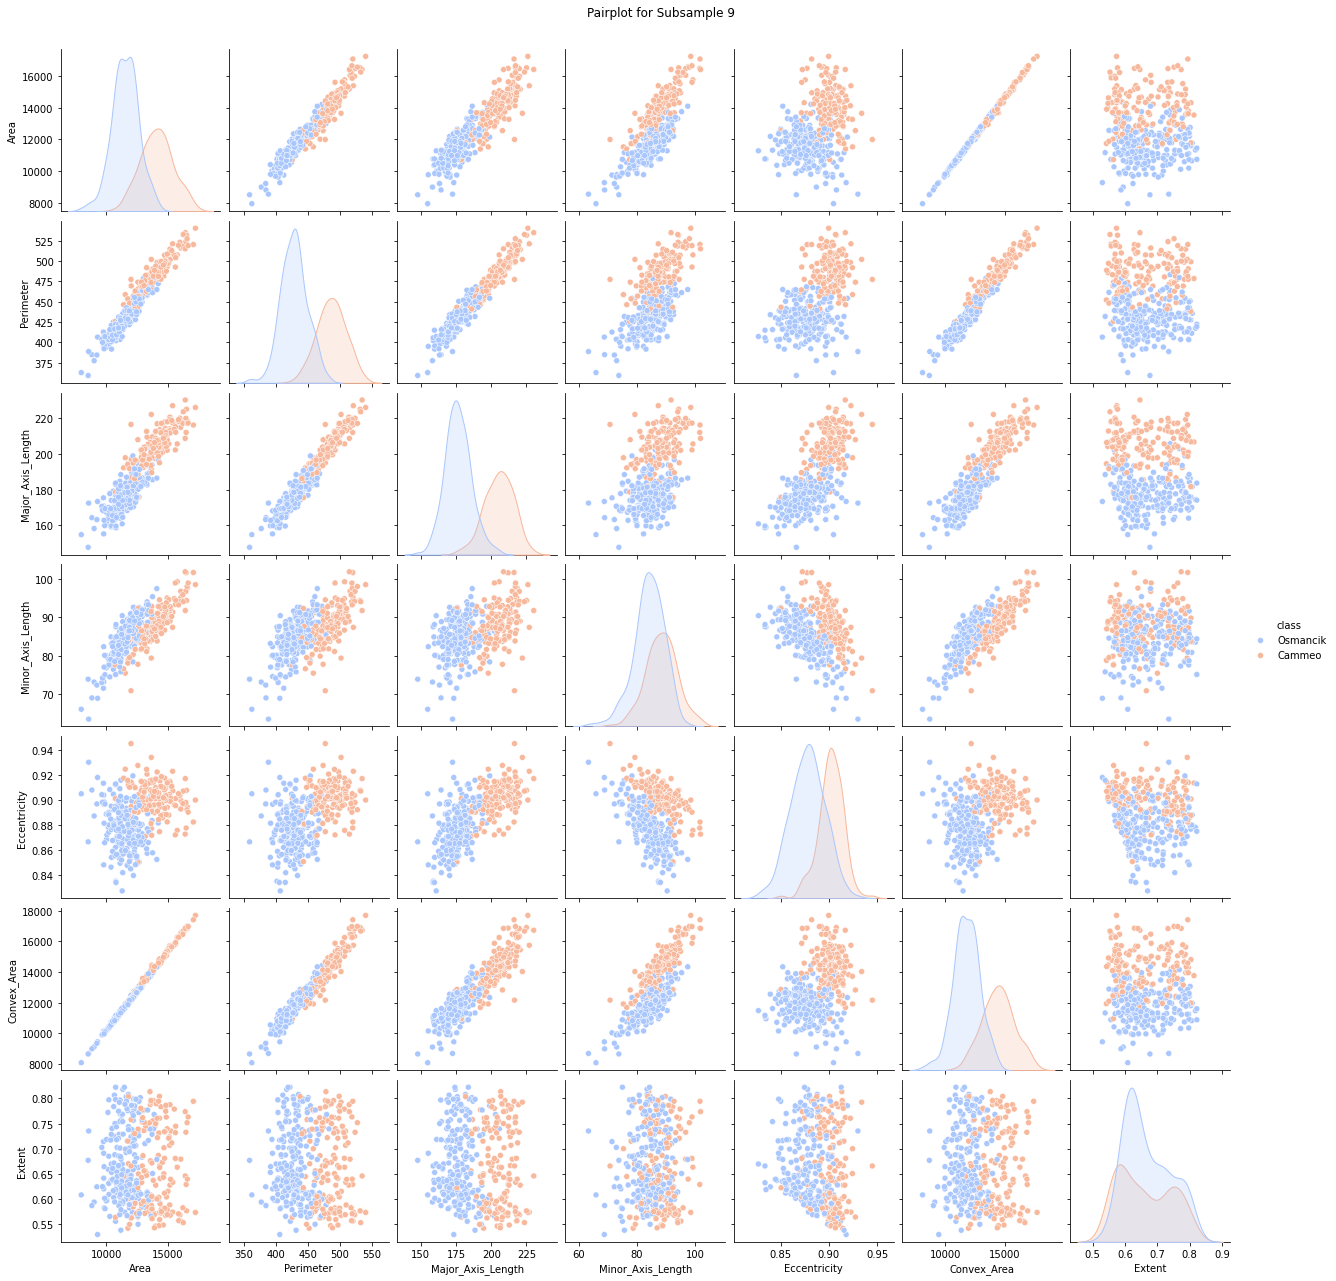

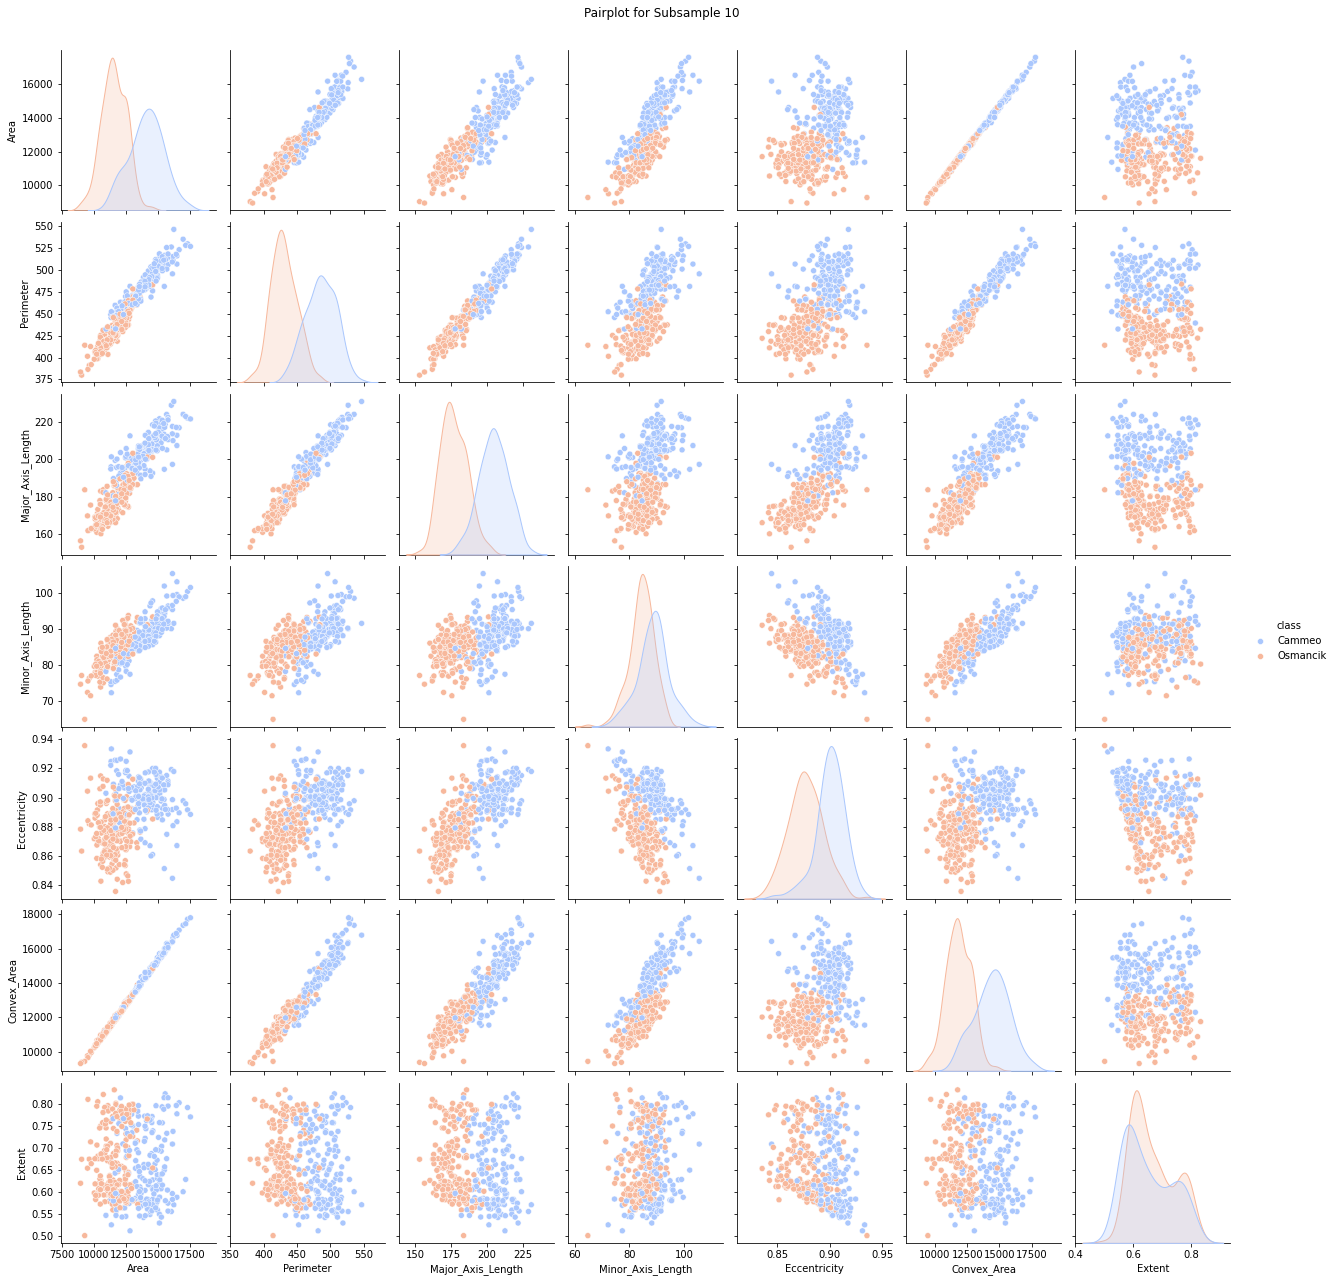

In [12]:
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

df = pd.concat([X, y], axis=1)
df.columns = list(X.columns) + ['class']

num_subsamples = 10
subsample_size = len(df) // num_subsamples

for i in range(num_subsamples):
    subsample = df.sample(subsample_size, random_state=i)
    
    sns.pairplot(subsample, hue='class', palette='coolwarm')
    plt.suptitle(f'Pairplot for Subsample {i+1}', y=1.02)
    plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

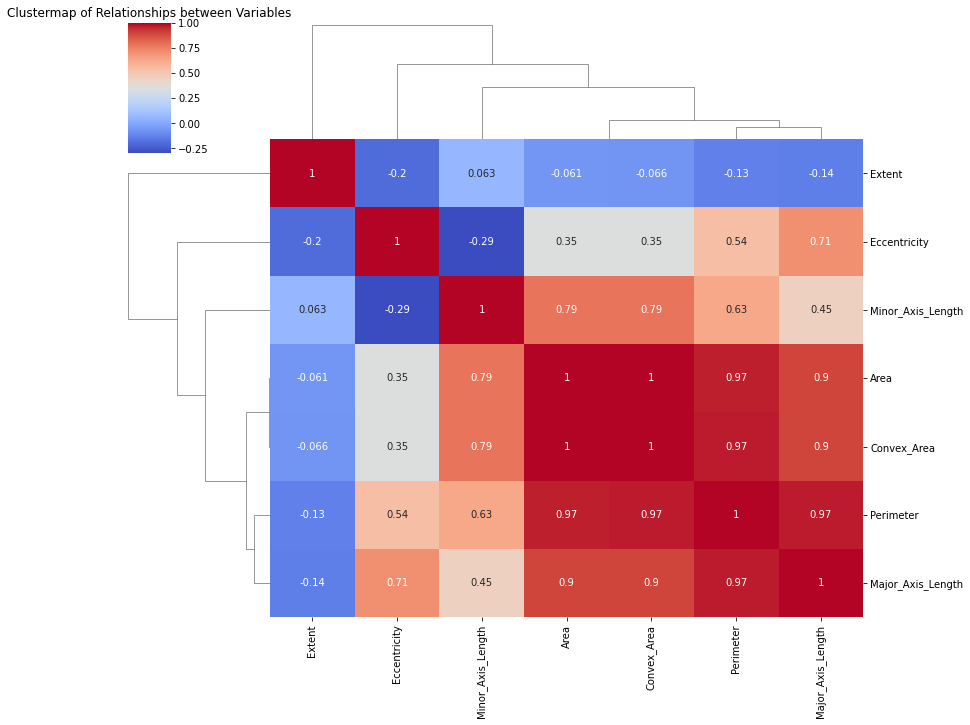

In [13]:
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

y = y.values.ravel()

y_encoded = LabelEncoder().fit_transform(y)
df = pd.concat([X, pd.Series(y_encoded, name='class')], axis=1)

correlation_matrix = X.corr()

sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', figsize=(12, 10))
plt.title('Clustermap of Relationships between Variables')
plt.show()


**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using gridsearch**

In [20]:
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

y = y.values.ravel()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [5]:
print("Initial Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Initial Model Performance:
Accuracy: 0.8793
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       350
           1       0.86      0.93      0.89       412

    accuracy                           0.88       762
   macro avg       0.88      0.87      0.88       762
weighted avg       0.88      0.88      0.88       762

Confusion Matrix:
[[287  63]
 [ 29 383]]


In [7]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters found by GridSearchCV:
{'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [10]:
best_svc = grid_search.best_estimator_
best_svc.fit(X_train, y_train)

y_pred_best = best_svc.predict(X_test)

In [13]:
print("Improved Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Improved Model Performance:
Accuracy: 0.9278
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       350
           1       0.92      0.94      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



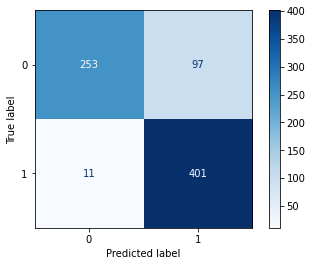

Confusion Matrix:
[[253  97]
 [ 11 401]]
True Positives: 253
False Positives: 97
False Negatives: 11
True Negatives: 401


In [15]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

print("Confusion Matrix:")
print(cm)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")